<a href="https://colab.research.google.com/github/KrishnaGupta4135/Patota-leafs-disease-classification/blob/main/Plant_disease_ANN_VGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import models,layers

In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=10

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Plant disease/PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2162 files belonging to 3 classes.


In [ ]:
class_names =dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

In [ ]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 0 1 2 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0]


In [ ]:
image_batch[0].shape

TensorShape([256, 256, 3])

In [ ]:
# print first Image / and chanege the tensor to numpy array
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[176. 167. 170.]
  [138. 129. 132.]
  [151. 142. 145.]
  ...
  [168. 162. 166.]
  [164. 158. 162.]
  [162. 156. 160.]]

 [[162. 153. 156.]
  [134. 125. 128.]
  [152. 143. 146.]
  ...
  [164. 158. 162.]
  [163. 157. 161.]
  [162. 156. 160.]]

 [[154. 145. 148.]
  [136. 127. 130.]
  [153. 144. 147.]
  ...
  [160. 154. 158.]
  [159. 153. 157.]
  [159. 153. 157.]]

 ...

 [[133. 122. 126.]
  [132. 121. 125.]
  [153. 142. 146.]
  ...
  [150. 141. 144.]
  [158. 149. 152.]
  [154. 145. 148.]]

 [[144. 133. 137.]
  [138. 127. 131.]
  [150. 139. 143.]
  ...
  [126. 117. 120.]
  [148. 139. 142.]
  [136. 127. 130.]]

 [[118. 107. 111.]
  [136. 125. 129.]
  [137. 126. 130.]
  ...
  [140. 131. 134.]
  [167. 158. 161.]
  [134. 125. 128.]]]


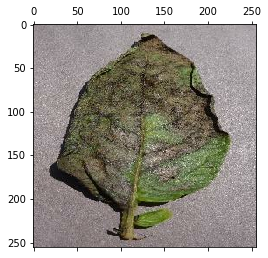

In [ ]:
plt.matshow(image_batch[0].numpy().astype("uint8"))

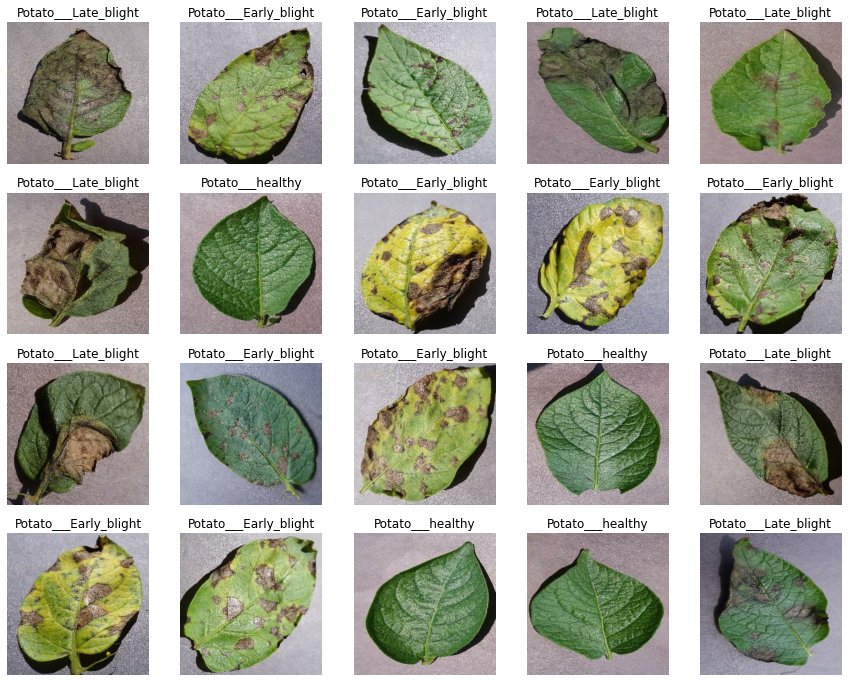

In [ ]:
#visualization of image
plt.figure(figsize=(15,12))
for i in range(20):
    ax=plt.subplot(4,5,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle =True,shuffle_size=10000):
    assert (train_split+test_split+val_split)==1
    
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed =12)
    
    train_size =int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    ds
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds


In [ ]:
train_ds,val_ds,test_ds =get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes =3

model = keras.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])
model.layers

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 128)               25165952  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 5)                 325       
                                                                 
Total params: 25,174,533
Trainable params: 25,174,533
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
%load_ext tensorboard
log_folder = 'logs'
callbacks = [
            EarlyStopping(patience = 5),
            
            ]

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
    
)

Epoch 1/10
54/54 [==============================] - 608s 260ms/step - loss: 6244.3281 - accuracy: 0.5613 - val_loss: 1334.5663 - val_accuracy: 0.6094
Epoch 2/10
54/54 [==============================] - 10s 194ms/step - loss: 1255.0503 - accuracy: 0.6759 - val_loss: 559.6038 - val_accuracy: 0.7552
Epoch 3/10
54/54 [==============================] - 10s 194ms/step - loss: 1787.4757 - accuracy: 0.7251 - val_loss: 2905.2717 - val_accuracy: 0.5260
Epoch 4/10
54/54 [==============================] - 10s 180ms/step - loss: 1360.3763 - accuracy: 0.6921 - val_loss: 904.8784 - val_accuracy: 0.6927
Epoch 5/10
54/54 [==============================] - 10s 177ms/step - loss: 1207.3588 - accuracy: 0.7008 - val_loss: 2389.8943 - val_accuracy: 0.5417
Epoch 6/10
54/54 [==============================] - 10s 193ms/step - loss: 745.0521 - accuracy: 0.7558 - val_loss: 1011.8359 - val_accuracy: 0.6719
Epoch 7/10
54/54 [==============================] - 10s 192ms/step - loss: 687.0428 - accuracy: 0.7523 - val

In [ ]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 4s 12ms/step - loss: 1087.4421 - accuracy: 0.8594


In [ ]:
Y_predicted =model.predict(test_ds)

8/8 [==============================] - 0s 10ms/step


In [ ]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes =3

base_model = tf.keras.applications.VGG16(input_shape=(256, 256, 3),
                                         include_top=False,
                                         weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
history = model.fit(
    train_ds,
    steps_per_epoch=len(train_ds),
    validation_data=val_ds,
    validation_steps=len(val_ds),
    epochs=10
)


Epoch 1/10
54/54 [==============================] - 26s 342ms/step - loss: -22.7237 - accuracy: 0.7894 - val_loss: -60.8404 - val_accuracy: 0.8802
Epoch 2/10
54/54 [==============================] - 21s 387ms/step - loss: -130.3199 - accuracy: 0.8542 - val_loss: -209.5304 - val_accuracy: 0.8802
Epoch 3/10
54/54 [==============================] - 18s 330ms/step - loss: -343.0685 - accuracy: 0.8553 - val_loss: -428.3747 - val_accuracy: 0.8802
Epoch 4/10
54/54 [==============================] - 19s 347ms/step - loss: -669.8552 - accuracy: 0.8594 - val_loss: -807.6326 - val_accuracy: 0.8698
Epoch 5/10
54/54 [==============================] - 18s 323ms/step - loss: -1093.8025 - accuracy: 0.8582 - val_loss: -1269.1704 - val_accuracy: 0.8542
Epoch 6/10
54/54 [==============================] - 18s 329ms/step - loss: -1668.7946 - accuracy: 0.8594 - val_loss: -1873.4330 - val_accuracy: 0.8438
Epoch 7/10
54/54 [==============================] - 18s 334ms/step - loss: -2527.4153 - accuracy: 0.8536